In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import tree
from sklearn.metrics import accuracy_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv(
    'ceneval_mentor_v3.csv',
    encoding='utf-8',
    low_memory=False,
    index_col=0
)
df.head(15)

,TIPO_EXA,ANO_NAC,SEXO,LENG_MA,LENG_PA,PLT_PROC,RAZ_RAPT,RAZ_RACT,RAZ_OPT,RAZ_PCUM,...,SER_TVP,SER_TABL,CUARTOS,SER_PC,SER_TV,SER_AUTO,SER_BANO,VAC_RM,DICTAMEN,VECES_EXAM
0,0.0077,0.90625,0,0.0,0.0,0.0355,0.0,1.0,1.0,0.0,...,1.0,1.0,0.22,1.0,1.0,1.0,1.0,0.0,0,1.0
1,0.0705,1.00000,1,0.0,0.0,0.0900,1.0,0.0,0.0,0.0,...,0.0,0.0,0.22,1.0,1.0,1.0,1.0,1.0,0,1.0
2,0.0705,0.90625,0,0.0,0.0,0.0900,1.0,1.0,1.0,0.0,...,0.0,0.0,0.41,0.0,1.0,0.0,1.0,0.0,1,1.0
3,0.0705,1.00000,1,0.0,0.0,0.0900,1.0,1.0,1.0,1.0,...,1.0,1.0,0.41,1.0,1.0,0.0,1.0,1.0,1,1.0
4,0.0705,0.84375,0,0.0,0.0,0.0900,1.0,1.0,1.0,0.0,...,0.0,0.0,0.22,1.0,1.0,0.0,1.0,0.0,1,1.0
5,0.0077,0.90625,1,0.0,0.0,0.0355,0.0,1.0,1.0,0.0,...,1.0,0.0,0.41,1.0,1.0,0.0,1.0,1.0,0,1.0
6,0.0705,0.78125,1,0.0,0.0,0.0900,1.0,1.0,1.0,0.0,...,0.0,0.0,0.41,1.0,1.0,0.0,1.0,0.0,0,1.0
7,0.0705,0.78125,1,0.0,0.0,0.0900,1.0,0.0,1.0,0.0,...,0.0,1.0,0.41,1.0,1.0,0.0,1.0,1.0,1,1.0
8,0.0705,0.78125,1,0.0,0.0,0.0900,0.0,1.0,1.0,0.0,...,0.0,0.0,0.22,0.0,1.0,0.0,0.0,0.0,1,1.0
9,0.0705,0.78125,0,0.0,0.0,0.0900,1.0,1.0,1.0,1.0,...,1.0,0.0,0.22,1.0,1.0,1.0,1.0,1.0,0,1.0


In [3]:
df.shape

(15613, 119)

In [4]:
df.groupby("DICTAMEN").size()

DICTAMEN
0    7466
1    8147
dtype: int64

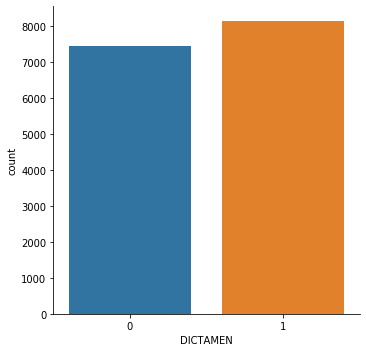

In [5]:
sb.catplot("DICTAMEN", data=df, kind="count")

In [6]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df.drop(["DICTAMEN"], axis=1).values  # Features
y=df['DICTAMEN']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [7]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [9]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6853116994022204


In [10]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
feature_imp = pd.Series(clf.feature_importances_,index=df.drop(["DICTAMEN"], axis=1).columns).sort_values(ascending=False)
feature_imp[0:50]

PLT_PROC     0.086898
TIPO_EXA     0.053580
ANO_NAC      0.032413
PRO_LIC      0.031376
CUAN_LIB     0.027354
ESC_PAD      0.027026
ESC_MAD      0.025704
CPV_CASA     0.020603
SIT_LAB      0.019022
PRPF_MAET    0.018645
SEMA_TRAB    0.018175
CUARTOS      0.017808
GAN_CLIC     0.017496
TIEM_TRAB    0.017168
HRS_TRAB     0.015557
MAE_FAC      0.014381
MAE_FIN      0.014197
NIV_EDU      0.013798
MAE_RET      0.013356
MAE_EIC      0.013092
PRPF_AACA    0.012953
MAE_DCO      0.012894
MAE_PPDE     0.012861
MAE_HEC      0.012762
MAE_UEDA     0.012734
MAE_CLAP     0.012712
MAE_RDE      0.012521
MAE_TAR      0.012446
MAE_ICI      0.012038
MAE_ASIS     0.011948
MAE_ICC      0.011702
PRPF_MPNC    0.011702
MAE_VNC      0.011530
RAZ_RAPT     0.010966
MAE_DMAT     0.010960
SEXO         0.010915
SER_TVP      0.010380
RAZ_RACT     0.009124
SER_MAET     0.008989
RAZ_CMNF     0.008988
SER_HOR      0.008925
SER_TABL     0.008836
VAC_RM       0.008599
SER_AUTO     0.008593
EVA_ETRA     0.008580
COM_EPAD  

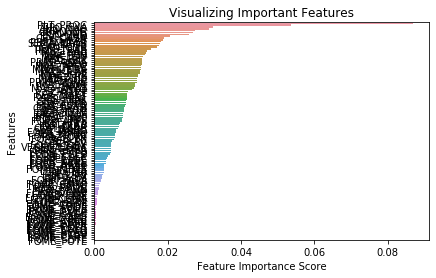

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
# Creating a bar plot
sb.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [52]:
# Import train_test_split function
from sklearn.model_selection import train_test_split


In [68]:
# Split dataset into features and labels
X=df[['PLT_PROC', 'TIPO_EXA', 'ANO_NAC' ,'PRO_LIC', 'CUAN_LIB', 'ESC_PAD', 'ESC_MAD','CPV_CASA','SIT_LAB','PRPF_MAET','SEMA_TRAB',    
'CUARTOS','GAN_CLIC', 'TIEM_TRAB','HRS_TRAB' , 'MAE_FAC' , 'MAE_FIN','NIV_EDU', 'MAE_RET','MAE_EIC','PRPF_AACA','MAE_DCO', 'MAE_PPDE',     
'MAE_HEC', 'MAE_UEDA', 'MAE_CLAP', 'MAE_RDE', 'MAE_TAR', 'MAE_ICI','MAE_ASIS','MAE_ICC','PRPF_MPNC','MAE_VNC','RAZ_RAPT','MAE_DMAT',     
'SEXO', 'SER_TVP']]
y=df['DICTAMEN']                                      
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [69]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)



In [70]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6812442817932296
